# Galaxy Collisions & Formations

* Galaxy collisions and formations are complex astrophysical processes that occur on cosmic scales. Understanding these phenomena involves the principles of astrophysics, gravity, and celestial mechanics.
* Galaxy collisions occur when two or more galaxies come close enough for their gravitational fields to interact significantly. The dynamics of these interactions can lead to mergers, where two galaxies combine to form a new, often larger, galaxy. The equation governing the gravitational force between two masses, by Newton's law of gravitation.
> $F=G \times \frac{M_{1}M_{2}}{r^2}$

* Numerical simulations using N-body simulations are often employed to model galaxy collisions. These simulations track the motion of individual stars or dark matter particles within galaxies, allowing scientists to study the evolution of the system over time.

* Galaxies form through the gravitational collapse of cosmic matter, primarily dark matter, gas, and dust. The process involves the aggregation of these materials into structures that eventually become galaxies. The Jeans instability criterion is often used to describe the conditions under which gravitational collapse occurs. For a region of space to collapse under its self-gravity, the gravitational potential energy must exceed the thermal energy and the kinetic energy.
> $M_J = \left( \frac{5 k T}{G} \right)^{3/2} \frac{1}{4\pi \rho}$

  where:

  $M_J$: the Jeans mass

  $k$: the Boltzmann constant

  $T$: temperature

  $G$: the gravitational constants

  $p$: density

* Observational techniques such as radio astronomy, optical astronomy, and more recently, gravitational wave detection, contribute to our understanding of galaxy formations by providing data on the distribution and properties of galaxies.

* N-body simulations are computational methods used in astrophysics and other fields to model the gravitational interaction and motion of a large number of celestial objects. The "N" in N-body stands for the number of particles or bodies being simulated. These simulations are particularly valuable for studying the dynamics of galaxies, star clusters, and other systems where gravitational interactions play a significant role. In the context of galaxy collisions and formations, N-body simulations are employed to model the movement and evolution of individual particles, which could represent stars, dark matter particles, or other components of a galactic system. The basic idea is to numerically integrate the equations of motion for each particle, taking into account the gravitational forces between all pairs of particles in the system.

**The steps involved in an N-body simulation typically include**:

* **Initial Conditions**: Assigning initial positions, velocities, and masses to each particle in the simulation. These initial conditions are often based on observations or theoretical predictions.
* **Integration**: Using numerical methods (such as the leapfrog method or the Runge-Kutta method) to integrate the equations of motion over small time steps. This involves calculating the gravitational forces between all pairs of particles at each step and updating the positions and velocities accordingly.
* **Time Evolution**: Repeating the integration process over many time steps to simulate the evolution of the system over time. This allows researchers to observe how galaxies interact, merge, or evolve dynamically.
* **Analysis**: Extracting relevant information from the simulation results, such as the final configuration of the galaxies, the distribution of matter, and other properties that can be compared with observations.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.constants import G
plt.style.use("dark_background")
%matplotlib inline

In [3]:
timeStep = 1e5 # time step for integration
particleNumber = 100 # number of particles
stepNumber = 1000 # number of time steps

In [10]:
# Function to calculate gravitational forces between particles
def CalculateForces(positions:list or tuple,masses:list or tuple)->list:
  forces = np.zeros_like(positions)
  for index in range(particleNumber):
    for subIndex in range(particleNumber):
      if index != subIndex:
        # Displacement vector (r)
        r = positions[subIndex]-positions[index]
        distance = np.linalg.norm(r) # calculates the Euclidean norm of the vector
        magnitudeForce = G*masses[index]*masses[subIndex]/distance**2
        forces[index] += magnitudeForce*r/distance
        # r / distance: This term normalizes the displacement vector r to obtain a unit vector pointing in the direction of the gravitational force.
        # magnitudeForce * (r / distance): This scales the normalized displacement vector by the magnitude of the gravitational force.
  return forces

In [14]:
# Initial conditions (random positions and masses for illustration)
positions = np.random.rand(particleNumber,3)*1e5
masses = np.random.rand(particleNumber)*1e30

In [ ]:
for step in range(stepNumber):
  forces = CalculateForces(positions,masses)
  # Update positions and velocities using Euler's method
  positions += timeStep*forces/masses[:,np.newaxis]

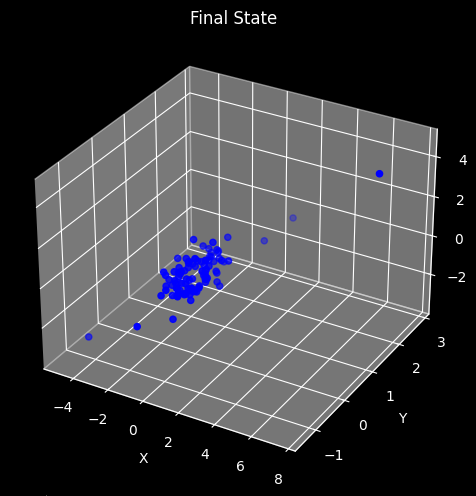

In [16]:
# Final state of the simulation
figure = plt.figure(figsize=(10,5))
ax = figure.add_subplot(111,projection="3d")
ax.scatter(positions[:,0],positions[:,1],positions[:,2],c="b",marker="o")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Final State")
plt.tight_layout()
plt.show()

In [58]:
positions = np.random.rand(particleNumber,3)*1e5
masses = np.random.rand(particleNumber)*1e30
velocities = np.zeros((particleNumber,3))

In [59]:
stepNumber = 100

In [60]:
for step in range(stepNumber):
  forces = CalculateForces(positions,masses)
  # Update positions and velocities using Euler's method
  positions += timeStep*forces/masses[:,np.newaxis]

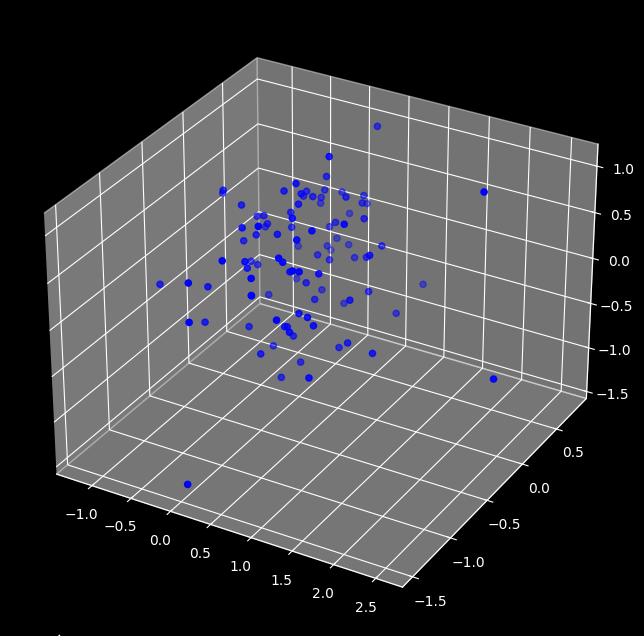

In [61]:
figure = plt.figure(figsize=(10,8))
ax = figure.add_subplot(111,projection="3d")
sct = ax.scatter(positions[:,0],positions[:,1],positions[:,2],c="b",marker="o")
plt.show()

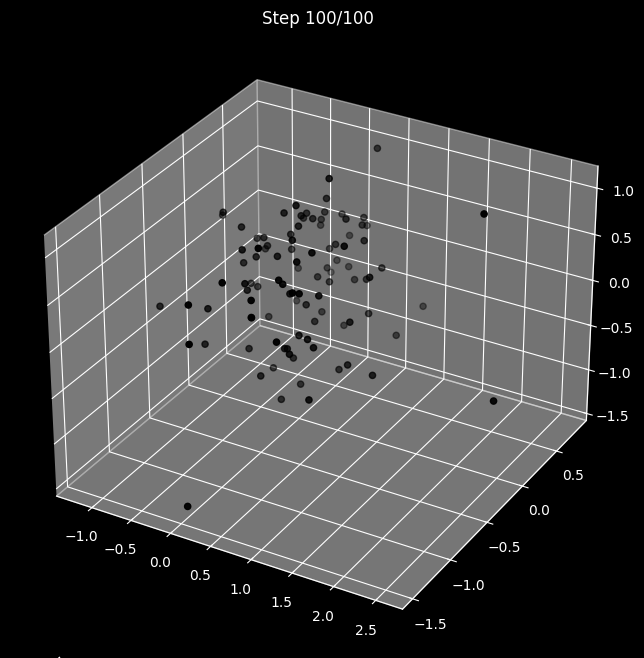

In [62]:
# Create a 3D plot
figure = plt.figure(figsize=(10,8))
ax = figure.add_subplot(111,projection="3d")
sct = ax.scatter(positions[:,0],positions[:,1],positions[:,2],c="black",marker="o")
def UpdateAnimation(frame,sc,positions)->None:
  global velocities
  forces = CalculateForces(positions,masses)
  # Verlet integration step
  positions += velocities*timeStep+0.5*forces/masses[:,np.newaxis]*timeStep**2
  newForces = CalculateForces(positions,masses)
  velocities += 0.5 * (forces+newForces)/masses[:,np.newaxis]*timeStep
  sct._offsets3d = (positions[:,0], positions[:,1], positions[:,2])
  ax.set_title(f'Step {frame+1}/{stepNumber}')
# Create animation
animation = FuncAnimation(figure,UpdateAnimation,fargs=(sct,positions),frames=stepNumber,interval=100,blit=False)
animationFile = "nBodySimulationOutput.mp4"
animation.save(animationFile,writer="ffmpeg",fps=10)
plt.show()

## Particle Positions & Velocities

In [66]:
def InitializeParticles(particleNumber:int)->tuple:
  positions = np.random.rand(particleNumber,3)*100 # Random initial positions within a 100x100x100 box
  velocities = np.random.rand(particleNumber,3)-0.5 # Random initial velocities between -0.5 and 0.5
  return positions,velocities

In [67]:
def UpdatePositions(positions:list,velocities:list,timeStep:float=0.1)->list:
  positions += velocities*timeStep
  return positions

In [71]:
def SimulationParticle(particleNumber:int,stepNumber:int)->None:
  positions,velocities = InitializeParticles(particleNumber)
  figure = plt.figure(figsize=(10,5))
  ax = figure.add_subplot(111,projection="3d")
  ax.set_xlim([0,100])
  ax.set_ylim([0,100])
  ax.set_zlim([0,100])
  def Update(frame)->None:
    nonlocal positions,velocities
    ax.clear()
    ax.set_xlim([0,100])
    ax.set_ylim([0,100])
    ax.set_zlim([0,100])
    positions = UpdatePositions(positions,velocities)
    ax.scatter(positions[:,0],positions[:,1],positions[:,2],marker="o",c="orange",alpha=0.5)
  animation = FuncAnimation(figure,Update,frames=stepNumber,interval=50,blit=False)
  animation.save("particleMotion.mp4",writer="ffmpeg",fps=30)

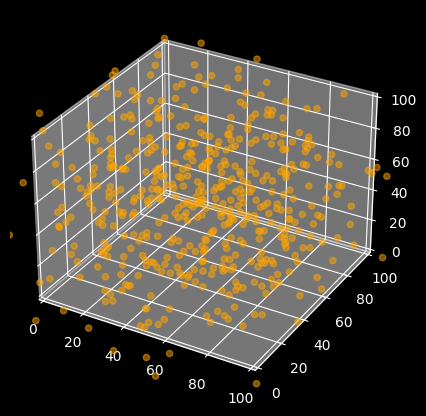

In [72]:
numberParticle = 500
stepNumber = 500
SimulationParticle(numberParticle,stepNumber)

## Collisions

In [73]:
def CalculateGravity(positions:list)->list:
  G = 1.0 # Gravitational constant (simplified for this example)
  particleNumber = len(positions)
  forces = np.zeros_like(positions)
  for index in range(particleNumber):
    for subIndex in range(particleNumber):
      if index != subIndex:
        displacementVector = positions[subIndex]-positions[index]
        distance = np.linalg.norm(displacementVector)
        forceMagnitude = G/distance**2
        forceDirection = displacementVector/distance
        forces[index] += forceMagnitude*forceDirection
  return forces

In [74]:
def UpdateParticles(positions:list,velocities:list,timeStep:float=0.1)->tuple:
  forces = CalculateGravity(positions)
  velocities += forces * timeStep
  positions += velocities * timeStep
  return positions,velocities

In [75]:
def SimulateGalaxyFormation(particleNumber:int,stepNumber:int)->None:
  positions,velocities = InitializeParticles(particleNumber)
  figure = plt.figure(figsize=(10,8))
  ax = figure.add_subplot(111,projection="3d")
  ax.set_xlim([0,100])
  ax.set_ylim([0,100])
  ax.set_zlim([0,100])
  def Update(frame)->None:
    nonlocal positions,velocities
    ax.clear()
    ax.set_xlim([0,100])
    ax.set_ylim([0,100])
    ax.set_zlim([0,100])
    positions,velocities = UpdateParticles(positions,velocities)
    ax.scatter(positions[:,0],positions[:,1],positions[:,2],c="blue",marker="o",alpha=0.6)
  animation = FuncAnimation(figure,Update,frames=stepNumber,interval=50,blit=False)
  animation.save("particleCollisions.mp4",writer="ffmpeg",fps=50)

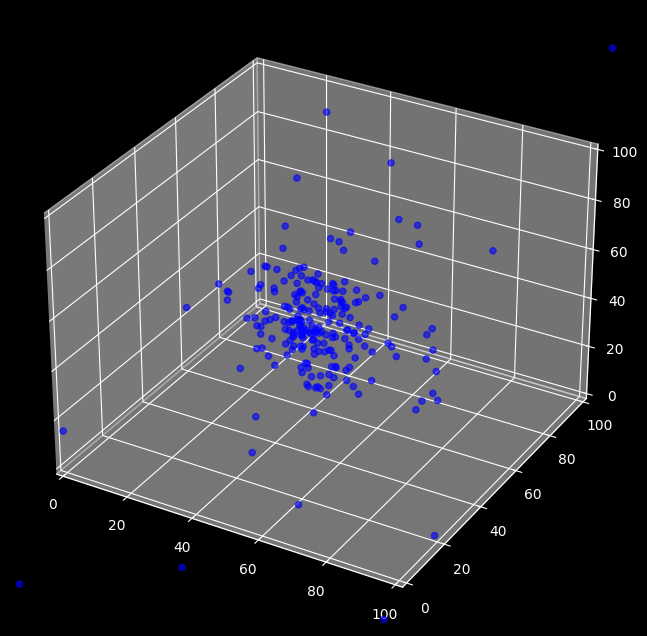

In [76]:
particleNumber = 230
stepNumber = 470
SimulateGalaxyFormation(particleNumber,stepNumber)